In [9]:
import pandas as pd 
# Read in the raw temperature and emissions datasets (they are in CSV format) 
raw_t = pd.read_csv('/content/GLB.Ts+dSST.csv', skiprows=1)
raw_e = pd.read_csv('/content/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv', skiprows=3)
raw_e

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.868319,7.235198,10.026179,10.634733,26.374503,26.046130,21.442559,22.000786,21.036245,20.771936,20.318353,20.426818,20.587669,20.311567,26.194875,25.934024,25.671162,26.420452,26.517293,27.200708,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123410,0.115142,0.086510,0.149651,0.165208,0.129996,0.135367,0.154503,0.167612,0.153558,0.181522,0.161894,0.167066,0.131783,0.150615,0.163104,0.201224,0.231961,0.293957,0.267772,0.269230,0.246823,0.233882,0.210643,0.183364,0.096197,0.085087,0.075806,0.068640,0.062435,0.056642,0.052763,0.040723,0.037235,0.037846,0.047377,0.050481,0.038410,0.051744,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.310341,0.293946,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,0.268941,0.172102,0.289718,0.480234,0.608224,0.564548,0.721246,0.751240,0.720776,0.628569,0.451354,0.469221,0.694737,0.683063,0.640966,0.611135,0.519355,0.551349,0.520983,0.471903,0.451619,0.544085,0.463508,0.437295,0.431744,0.415531,0.410523,0.441721,0.288119,0.787033,0.726233,0.496361,0.475815,0.577083,0.581961,0.574316,0.722959,0.500225,1.001878,0.985736,1.105019,1.203134,1.185000,1.234425,1.244092,1.252681,1.330219,1.253776,1.290307,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,1.519551,1.558968,1.753240,1.989498,2.515914,2.303897,1.849007,1.910634,2.013585,2.275876,2.530625,2.898209,1.935058,2.693024,2.624857,2.683240,2.694291,2.658015,2.665356,2.414061,2.331599,2.783243,1.678107,1.312213,0.774725,0.723790,0.600204,0.654537,0.636625,0.490365,0.560271,0.960164,0.978175,1.053304,1.229541,1.412697,1.376213,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.467336,7.182457,6.912053,6.736055,6.494200,6.662052,7.065071,7.239713,7.660784,7.975454,8.019284,7.786950,7.590615,7.315761,7.358625,7.299872,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.683679,0.494324,0.710130,0.525293,0.644143,0.686312,0.595799,0.517041,1.940466,0.767437,0.405577,0.313630,0.234116,0.420242,0.339045,0.319965,0.368387,0.415295,0.418921,0.420264,0.417864,0.514063,0.696341,0.713607,0.778529,0.904474,0.831807,0.841254,0.894977,0.893385,0.819517,0.748475,0.768266,

In [10]:
date_rng = pd.date_range(start='1/1/1880', end='1/03/2019', freq='M')

type(date_rng[0])



t = pd.DataFrame(date_rng, columns=['date'])

t['Avg_Anomaly_deg_C'] = None


t.set_index('date', inplace=True)


t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,None
1880-02-29,None
1880-03-31,None
1880-04-30,None
1880-05-31,None


In [11]:
raw_t = raw_t.iloc[:,:13]
raw_t.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-.09,-.16,-.23,-.20,-.23
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-.03,-.14,-.21,-.22,-.11
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-.06,-.10,-.25,-.16,-.25
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-.15,-.21,-.14,-.22,-.16
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-.26,-.27,-.24,-.30,-.29


In [12]:

import calendar
from datetime import datetime


def populate_df_with_anomolies_from_row(row):
    year = row['Year']
    
    monthly_anomolies = row.iloc[1:]
   
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
       
        last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]
        
        date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')
     
        t.loc[date_index] = monthly_anomolies[month]


_ = raw_t.apply(lambda row: populate_df_with_anomolies_from_row(row), axis=1)


t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.2
1880-05-31,-0.12


In [13]:

import numpy as np


def clean_anomaly_value(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN
    

t['Avg_Anomaly_deg_C'] = t['Avg_Anomaly_deg_C'].apply(lambda raw_value: clean_anomaly_value(raw_value))


t.fillna(method='ffill', inplace=True)


t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.20
1880-05-31,-0.12


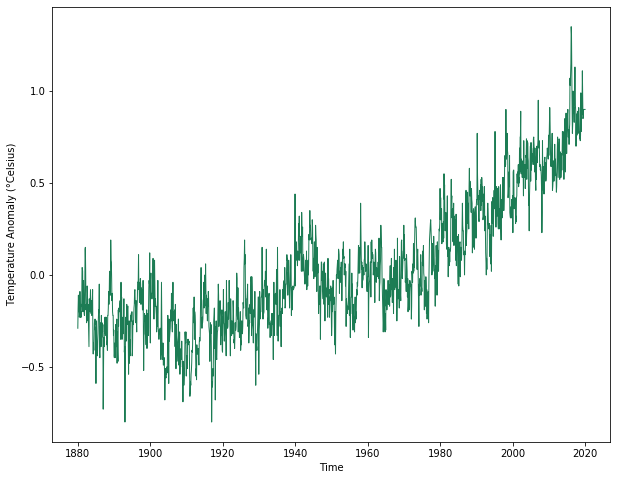

In [14]:

import matplotlib.pyplot as plt


%matplotlib inline


plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t, color='#1C7C54', linewidth=1.0)

In [15]:
t.resample('A').mean().head()

,Avg_Anomaly_deg_C
date,
1880-12-31,-0.187500
1881-12-31,-0.100833
1882-12-31,-0.110000
1883-12-31,-0.191667
1884-12-31,-0.294167


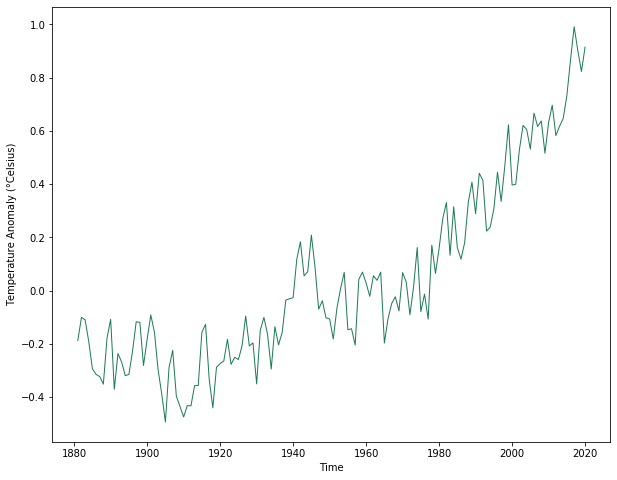

In [16]:

plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t.resample('A').mean(), color='#1C7C54', linewidth=1.0)

In [17]:


def populate_df(row):
    index = str(row['date'].year)
    value = raw_e_world.loc[index]
    return value
  

raw_e_world = raw_e[raw_e['Country Name']=='World'].loc[:,'1960':'2018']


raw_e_world = raw_e_world.T
raw_e_world.columns = ['value']


date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
e = pd.DataFrame(date_rng, columns=['date'])


v = e.apply(lambda row: populate_df(row), axis=1)
e['Global CO2 Emissions per Capita'] = v
e.set_index('date', inplace=True)
e.head()

,Global CO2 Emissions per Capita
date,
1960-12-31,3.099157
1961-12-31,3.070018
1962-12-31,3.140957
1963-12-31,3.245109
1964-12-31,3.361380


In [18]:
e[e.index.year>2011]


,Global CO2 Emissions per Capita
date,
2012-12-31,5.005069
2013-12-31,4.997599
2014-12-31,4.980707
2015-12-31,NaN
2016-12-31,NaN
2017-12-31,NaN
2018-12-31,NaN


In [19]:
e.fillna(method='ffill', inplace=True)
e[e.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,5.005069
2013-12-31,4.997599
2014-12-31,4.980707
2015-12-31,4.980707
2016-12-31,4.980707
2017-12-31,4.980707
2018-12-31,4.980707


In [20]:
e['1984-01-04':'1990-01-06']


,Global CO2 Emissions per Capita
date,
1984-12-31,4.024779
1985-12-31,4.074093
1986-12-31,4.124274
1987-12-31,4.152156
1988-12-31,4.226610
1989-12-31,4.243794


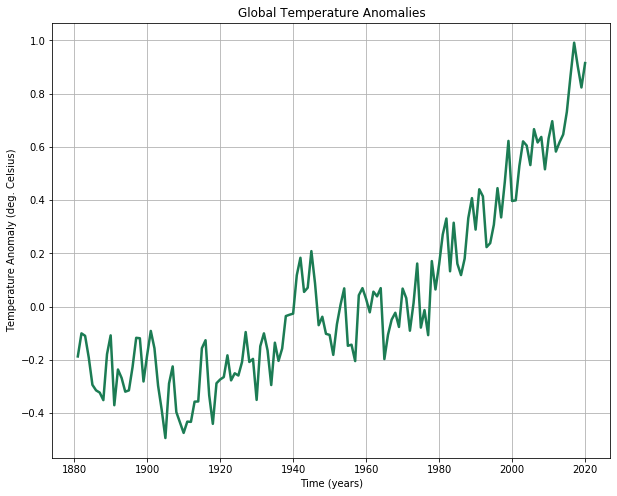

In [21]:

import matplotlib.pyplot as plt

%matplotlib inline


t_resampled = t.resample('A').mean()


fig, ax = plt.subplots(figsize=(10,8))


ax.plot(t_resampled, color='#1C7C54', linewidth=2.5)


ax.set(xlabel='Time (years)', ylabel='Temperature Anomaly (deg. Celsius)',
       title='Global Temperature Anomalies')

# Enable grid
ax.grid()

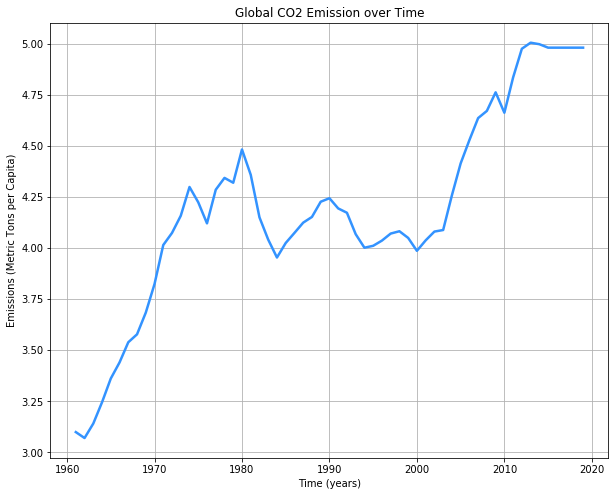

In [22]:

fig, ax = plt.subplots(figsize=(10,8))


ax.plot(e, color='#3393FF', linewidth=2.5)


ax.set(xlabel='Time (years)', ylabel='Emissions (Metric Tons per Capita)',
       title='Global CO2 Emission over Time')


ax.grid()

In [25]:


import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)  

In [26]:
t.resample('A').mean().iplot(kind='line', xTitle='Time (years)', color='#1C7C54',
                  yTitle='Temperature Anomaly (deg. Celsius)', title='Global Temperature Anomalies')


In [27]:
e.iplot(kind='line', xTitle='Time (years)', color='#3393FF',
                  yTitle='Emissions (Metric Tons per Capita)', title='Global CO2 Emission over Time')


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


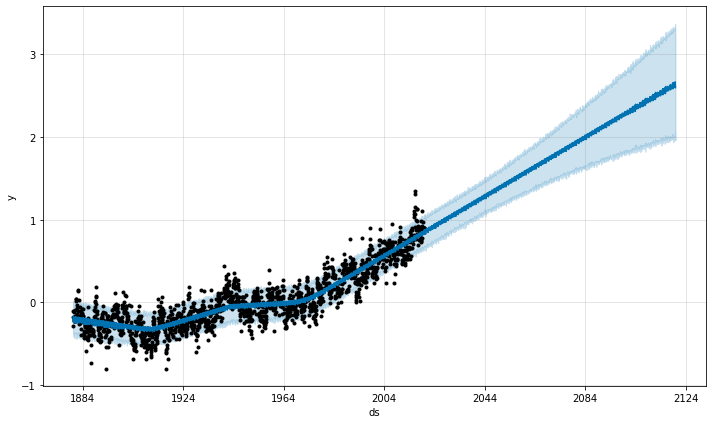

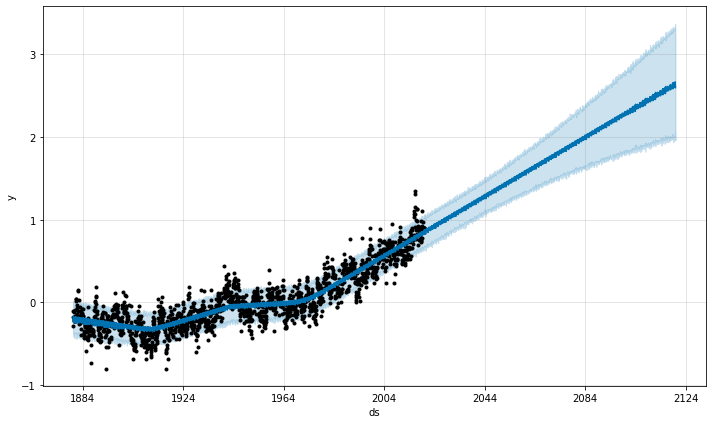

In [28]:

from fbprophet import Prophet

\
t_prophet = pd.DataFrame()
t_prophet['ds'] = t.index
t_prophet['y'] = t['Avg_Anomaly_deg_C'].values


m = Prophet()
m.fit(t_prophet)


future = m.make_future_dataframe(freq='m', periods=100*12)
forecast = m.predict(future)


m.plot(forecast)

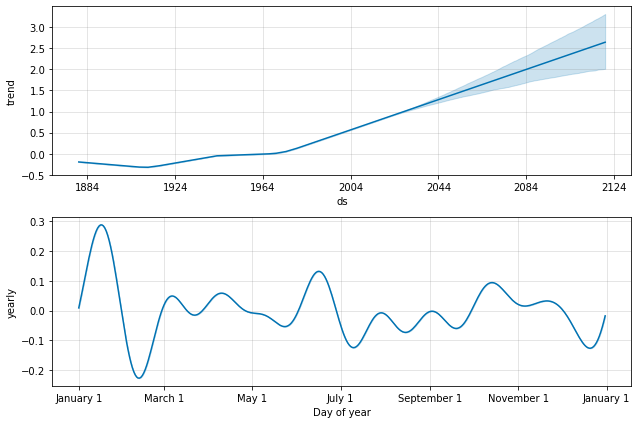

In [29]:
# Plot the forecast components
m.plot_components(forecast);